In [28]:
import matplotlib.pyplot as plt, argparse, numpy as np, math, sys, copy
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
from skimage import io
from collections import defaultdict
import SPHC as sphc

In [29]:
imagePath = '385039.jpg'

#SLIC Parameters:
numSegments = 500  # How many superpixels to start with - input for SLIC function
Sigma = 2 # This parameter controls superpixel shape. Higher values make superpixels more square.

#SPHC Parameters:
segmentsToMerge = [100, 200, 300, 400, 480] #3 # How many superpixels to merge based on color similarity
distance_limit = .1 # Limits which segments get merged based on their difference in average color

In [30]:
image = img_as_float(io.imread(imagePath))
SLICsegm_grid = slic(image, n_segments = numSegments, sigma = Sigma)

In [31]:
'''
SPHCsegm_grid = sphc.getSPHCsegments(SLICsegm_grid, image, segmentsToMerge, max_dist = distance_limit)
'''

'\nSPHCsegm_grid = sphc.getSPHCsegments(SLICsegm_grid, image, segmentsToMerge, max_dist = distance_limit)\n'

In [32]:
SPHCsegm_grid = sphc.getSPHCsegmentsVect(SLICsegm_grid
                                         , image
                                         , numToMerge = segmentsToMerge
                                         , max_dist = distance_limit)

Initiating Segment Attributes...
Merging Segments...
347 segments merged - final


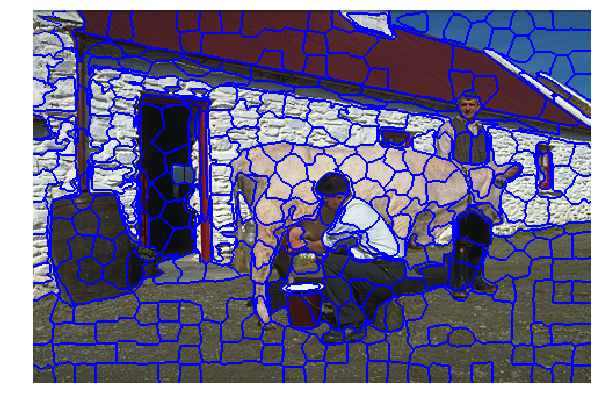

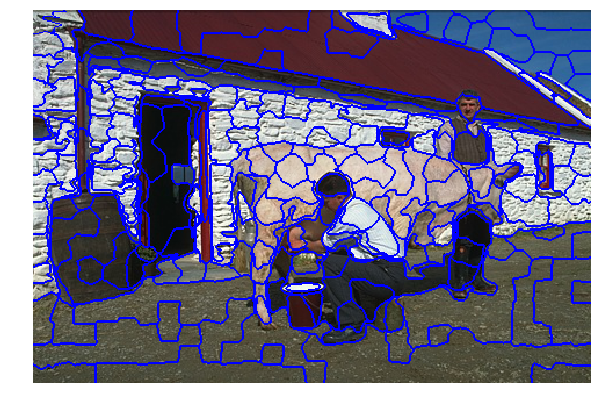

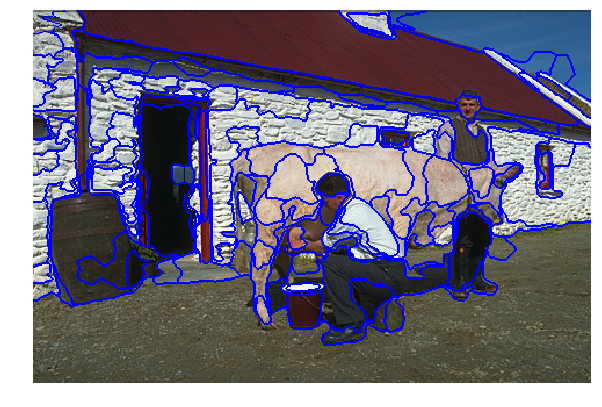

In [33]:
for segs in SPHCsegm_grid:
    #print(segs)
    fig = plt.figure("Segments", figsize = (10,10))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(mark_boundaries(image, segs, color=(0,0,1)))
    plt.axis("off")
    plt.show()

In [34]:
'''

def X(segm_grid, image, numToMerge = [], max_dist = 1.0):
    print("Initiating Segment Attributes...")
    segm_dict = sphc.initiateSegmentAttributes(segm_grid, image)
    shortest_dist = 0.0
    merge_count = 0
    
    maxNumToMerge = numToMerge[-1]
    lenNumToMerge = len(numToMerge)
    dicts = []
    j = 0

    print("Merging Segments...")
    while shortest_dist <= max_dist and merge_count <= maxNumToMerge:
        nearest_neighbors, shortest_dist = sphc.getNearestNeighbors(segm_dict)
        segm_dict = sphc.mergeSegments(segm_dict, nearest_neighbors)
        merge_count += 1
        
        if(j < lenNumToMerge):
            if(merge_count == numToMerge[j]):
                dicts.append(segm_dict)
                j += 1
            
        print((str(merge_count) + '/' + str(maxNumToMerge) + ' segments merged \r'), end='')
            
    print(merge_count, "segments merged - final")

    newSegmGrid = copy.deepcopy(segm_grid)
    segGrids = []
    
    for d in dicts:
        for k, v in d.items():
            for coord in v['coord']:
                newSegmGrid[coord[0], coord[1]] = int(k)
        segGrids.append(newSegmGrid)

    return segGrids
'''

'\n\ndef X(segm_grid, image, numToMerge = [], max_dist = 1.0):\n    print("Initiating Segment Attributes...")\n    segm_dict = sphc.initiateSegmentAttributes(segm_grid, image)\n    shortest_dist = 0.0\n    merge_count = 0\n    \n    maxNumToMerge = numToMerge[-1]\n    lenNumToMerge = len(numToMerge)\n    dicts = []\n    j = 0\n\n    print("Merging Segments...")\n    while shortest_dist <= max_dist and merge_count <= maxNumToMerge:\n        nearest_neighbors, shortest_dist = sphc.getNearestNeighbors(segm_dict)\n        segm_dict = sphc.mergeSegments(segm_dict, nearest_neighbors)\n        merge_count += 1\n        \n        if(j < lenNumToMerge):\n            if(merge_count == numToMerge[j]):\n                dicts.append(segm_dict)\n                j += 1\n            \n        print((str(merge_count) + \'/\' + str(maxNumToMerge) + \' segments merged \r\'), end=\'\')\n            \n    print(merge_count, "segments merged - final")\n\n    newSegmGrid = copy.deepcopy(segm_grid)\n    segGr